In [1]:
import mlgrad.pca as pca
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.inventory as inventory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',')
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [3]:
X = df["log.Te"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["log.light"].values

# X = np.log(X)
# Y = np.log(Y)

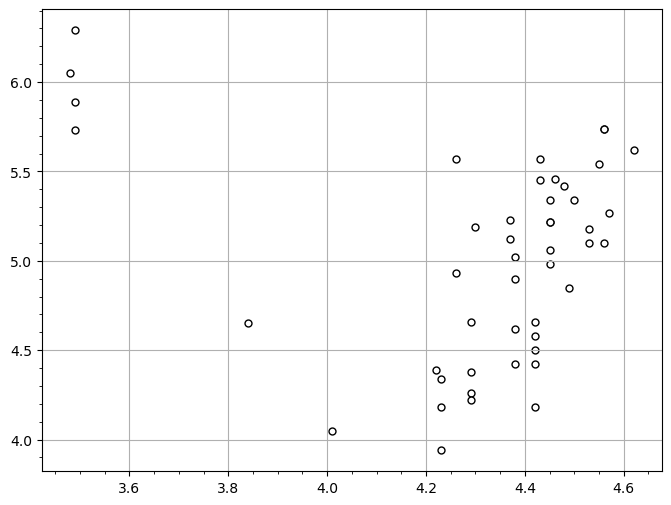

In [4]:
plt.figure(figsize=(8.0, 6.0))
plt.scatter(X, Y, s=25, c='w', edgecolors='k', linewidth=1.)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [5]:
XY = np.c_[X, Y]
print(len(XY))

47


In [6]:
c0 = pca.location(XY)
S0 = pca.scatter_matrix(XY - c0)
S0 = S0 / np.linalg.det(S0) ** (1/2)
S0 = np.linalg.inv(S0)
print(c0)
print(S0)

[4.310 5.012]
[[2.009 0.215]
 [0.215 0.521]]


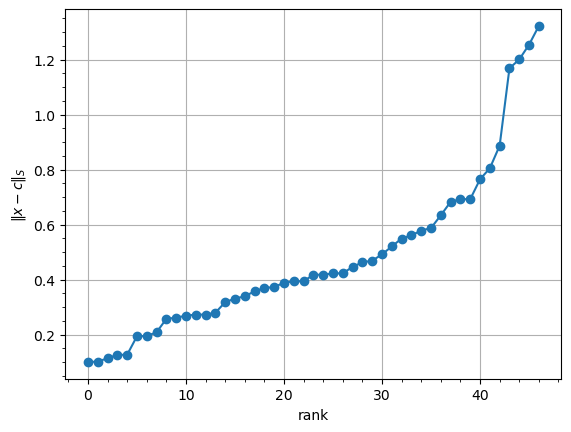

In [7]:
XY0 = XY - c0
D0 = np.sqrt([(xy @ S0) @ xy for xy in XY0])
plt.plot(sorted(D0), marker='o')
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

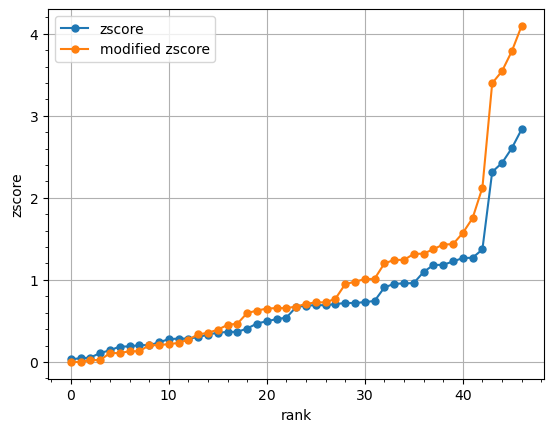

In [8]:
Z0 = inventory.zscore(D0)
Zm0 = inventory.modified_zscore(D0)
plt.plot(sorted(abs(Z0)), marker='o', markersize=5, label="zscore")
plt.plot(sorted(abs(Zm0)), marker='o', markersize=5, label="modified zscore")
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

In [19]:
# maf = af.averaging_function("WM", 
#                             funcs.QuantileFunc(0.84, funcs.SoftAbs_Sqrt(0.001)))
maf = af.averaging_function("WMZ", funcs.SoftAbs_Sqrt(0.001), kwds={"alpha":3.0})
c1 = pca.robust_location(XY, maf)
S1 = pca.robust_scatter_matrix(XY - c1, maf)
# S1 = S1 / np.linalg.det(S1) ** (1/2)
print(c1)
print(S1)

[4.385 4.888]
[[ 5.776 -0.899]
 [-0.899  0.313]]


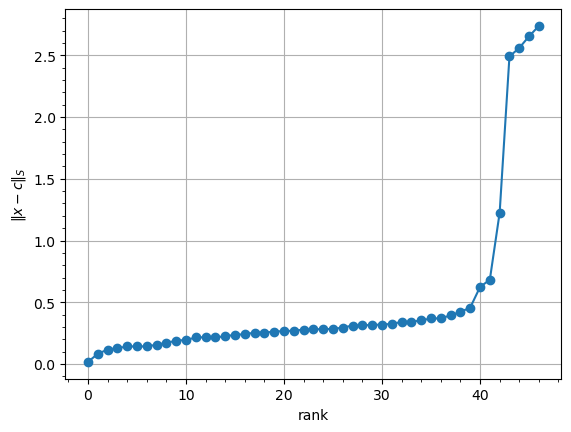

In [20]:
XY1 = XY - c1
D1 = np.sqrt([(xy @ S1) @ xy for xy in XY1])
plt.plot(sorted(D1), marker='o')
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

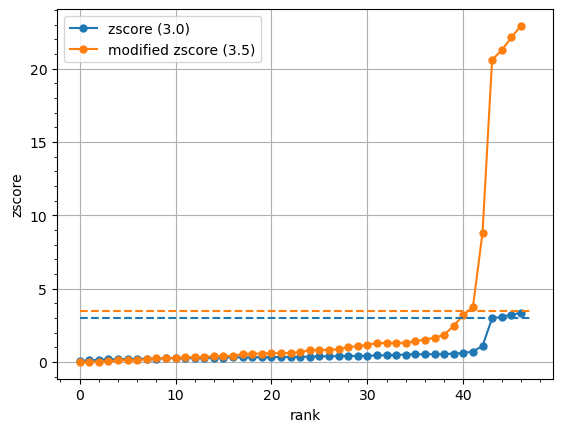

In [21]:
Z1 = inventory.zscore(D1)
Zm1 = inventory.modified_zscore(D1)
ls1 = plt.plot(sorted(abs(Z1)), marker='o', markersize=5, label="zscore (3.0)")
ls1m = plt.plot(sorted(abs(Zm1)), marker='o', markersize=5, label="modified zscore (3.5)")
plt.hlines(3.0, 0, len(XY), linestyle='--', color=ls1[0].get_color())
plt.hlines(3.5, 0, len(XY), linestyle='--', color=ls1m[0].get_color())
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

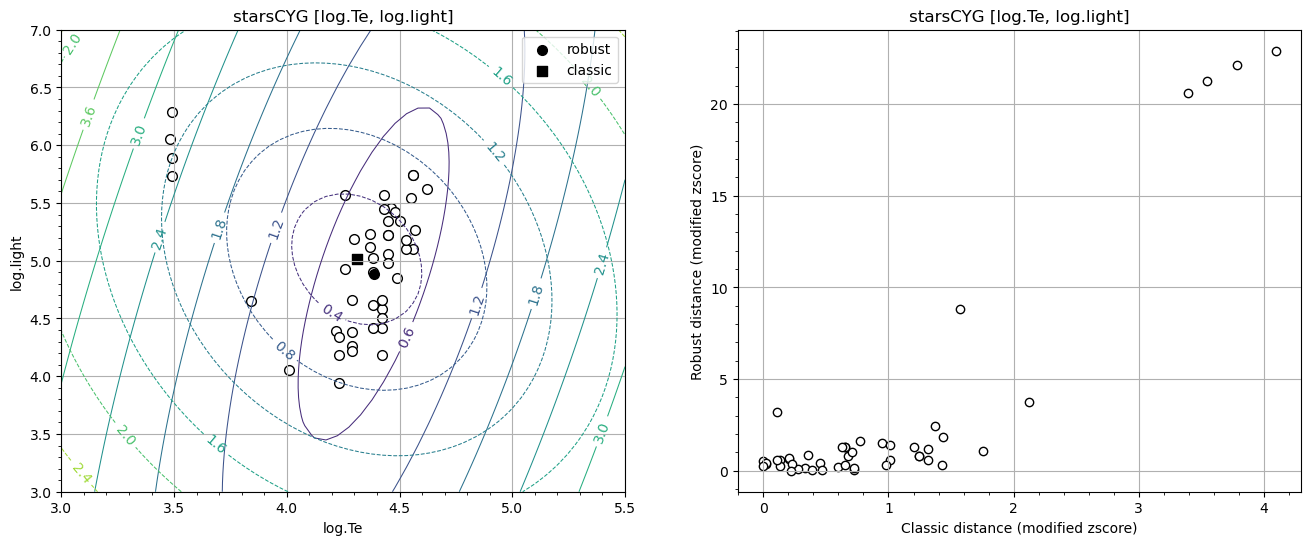

In [22]:
xrange = np.linspace(3., 5.5, 50)
yrange = np.linspace(3., 7., 50)
XX2, YY2 = np.meshgrid(xrange, yrange)
XY2 = np.c_[XX2.ravel(), YY2.ravel()]

plt.figure(figsize=(16.0, 6.0))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([c1[0]], [c1[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='robust')
plt.scatter([c0[0]], [c0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='classic')
DD1 = np.sqrt([(xy-c1) @ S1 @ (xy-c1) for xy in XY2])
DD1_s = DD1.reshape(XX2.shape)
DD0 = np.sqrt([(xy-c0) @ S0 @ (xy-c0) for xy in XY2])
DD0_s = DD0.reshape(XX2.shape)
# print(DD0.min(), DD0.max())
# print(DD1.min(), DD1.max())
ct1 = plt.contour(XX2, YY2, DD1_s, linewidths=0.75)
plt.clabel(ct1, )
ct0 = plt.contour(XX2, YY2, DD0_s, linewidths=0.75, linestyles='--')
plt.clabel(ct0, )
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.xlabel("log.Te")
plt.ylabel("log.light")
plt.title('starsCYG [log.Te, log.light]')

plt.subplot(1,2,2)
# plt.scatter(D0, D1, c='w', edgecolors='k', linewidth=1)
# plt.xlabel('Classic distance')
# plt.ylabel('Robust distance')
plt.scatter(abs(Zm0), abs(Zm1), c='w', edgecolors='k', linewidth=1)
plt.xlabel('Classic distance (modified zscore)')
plt.ylabel('Robust distance (modified zscore)')
plt.title('starsCYG [log.Te, log.light]')
plt.grid(1)
plt.minorticks_on()

plt.show()

In [23]:
41/47

0.8723404255319149